<a href="https://colab.research.google.com/github/NatthanichaBoonluea/Term-Project/blob/main/CS245_project_R008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##กลุ่ม R008

สิรวิชญ์ ทิมสุวรรณ 6309682067

ณัฎฐณิชา บุญเหลือ 6309682315

นาดา ทองคำ 6309682430

####ไฟล์ของ 6309682315 ใช้ตรวจคำตอบ

#Predicting House Prices using Machine Learning

## 1. Problem Difinition
>  Predict sales prices and practice feature engineering with machine learning.

## 1. Data
[dataset from Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) 

There are 2 datasets:

1. **train.csv** - the training set
2. **test.csv** - the test set

## 3. Evaluation
> Submissions are evaluated on Root-Mean-Squared-Error (RMSE) and if we can reach 97% of R^2 at predicting. we'll pursure this project.

## 4. Feature
Kaggle provide a data decription which contains information about what each attribute of the dataset. 
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*MSSubClass: The building class
*MSZoning: The general zoning classification
*LotFrontage: Linear feet of street connected to property
*LotArea: Lot size in square feet
*Street: Type of road access
*Alley: Type of alley access
*LotShape: General shape of property
*LandContour: Flatness of the property
*Utilities: Type of utilities available
*LotConfig: Lot configuration
*LandSlope: Slope of property
*Neighborhood: Physical locations within Ames city limits
*Condition1: Proximity to main road or railroad
*Condition2: Proximity to main road or railroad (if a second is present)
*BldgType: Type of dwelling
*HouseStyle: Style of dwelling
*OverallQual: Overall material and finish quality
*OverallCond: Overall condition rating
*YearBuilt: Original construction date
*YearRemodAdd: Remodel date
*RoofStyle: Type of roof
*RoofMatl: Roof material
*Exterior1st: Exterior covering on house
*Exterior2nd: Exterior covering on house (if more than one material)
*MasVnrType: Masonry veneer type
*MasVnrArea: Masonry veneer area in square feet
*ExterQual: Exterior material quality
*ExterCond: Present condition of the material on the exterior
*Foundation: Type of foundation
*BsmtQual: Height of the basement
*BsmtCond: General condition of the basement
*BsmtExposure: Walkout or garden level basement walls
*BsmtFinType1: Quality of basement finished area
*BsmtFinSF1: Type 1 finished square feet
*BsmtFinType2: Quality of second finished area (if present)
*BsmtFinSF2: Type 2 finished square feet
*BsmtUnfSF: Unfinished square feet of basement area
*TotalBsmtSF: Total square feet of basement area
*Heating: Type of heating
*HeatingQC: Heating quality and condition
*CentralAir: Central air conditioning
*Electrical: Electrical system
*1stFlrSF: First Floor square feet
*2ndFlrSF: Second floor square feet
*LowQualFinSF: Low quality finished square feet (all floors)
*GrLivArea: Above grade (ground) living area square feet
*BsmtFullBath: Basement full bathrooms
*BsmtHalfBath: Basement half bathrooms
*FullBath: Full bathrooms above grade
*HalfBath: Half baths above grade
*Bedroom: Number of bedrooms above basement level
*Kitchen: Number of kitchens
*KitchenQual: Kitchen quality
*TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*Functional: Home functionality rating
*Fireplaces: Number of fireplaces
*FireplaceQu: Fireplace quality
*GarageType: Garage location
*GarageYrBlt: Year garage was built
*GarageFinish: Interior finish of the garage
*GarageCars: Size of garage in car capacity
*GarageArea: Size of garage in square feet
*GarageQual: Garage quality
*GarageCond: Garage condition
*PavedDrive: Paved driveway
*WoodDeckSF: Wood deck area in square feet
*OpenPorchSF: Open porch area in square feet
*EnclosedPorch: Enclosed porch area in square feet
*3SsnPorch: Three season porch area in square feet
*ScreenPorch: Screen porch area in square feet
*PoolArea: Pool area in square feet
*PoolQC: Pool quality
*Fence: Fence quality
*MiscFeature: Miscellaneous feature not covered in other categories
*MiscVal: $Value of miscellaneous feature
*MoSold: Month Sold
*YrSold: Year Sold
*SaleType: Type of sale
*SaleCondition: Condition of sale

### Importing data and preparing it for modelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/project/test.csv")

In [ ]:
# we will drop 'Id' column since it has no correlation with the target but we will keep it and we will recall it again after we finished modelling.
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [ ]:
# check shape jof train and test datasets
train.shape, test.shape

((1460, 80), (1459, 79))

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


### Exploratory Data Analysis

###Correlation

*   +1 : Complete positive correlation
*   +0.8 : Strong positive correlation
*   +0.6 : Moderate positive correlation
*   0 : no correlation whatsoever
*   -0.8 : Strong negative correlation
*   -1 : Complete negative correlation

In [ ]:
# show how variables corelate with each others
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


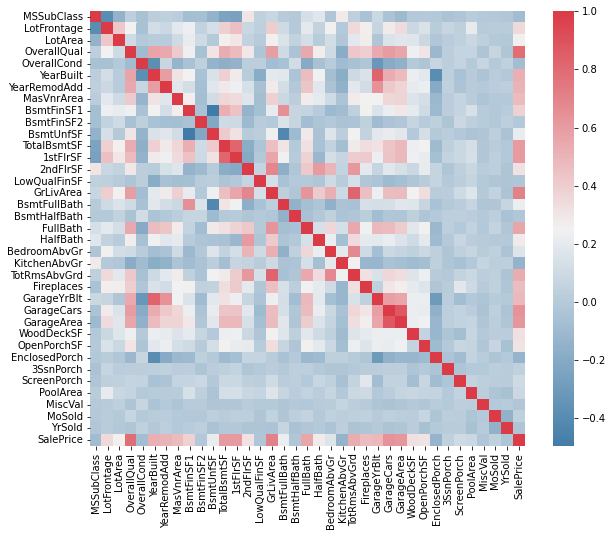

In [ ]:
# show how variables correlate with each others by make it more visualize.
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax);

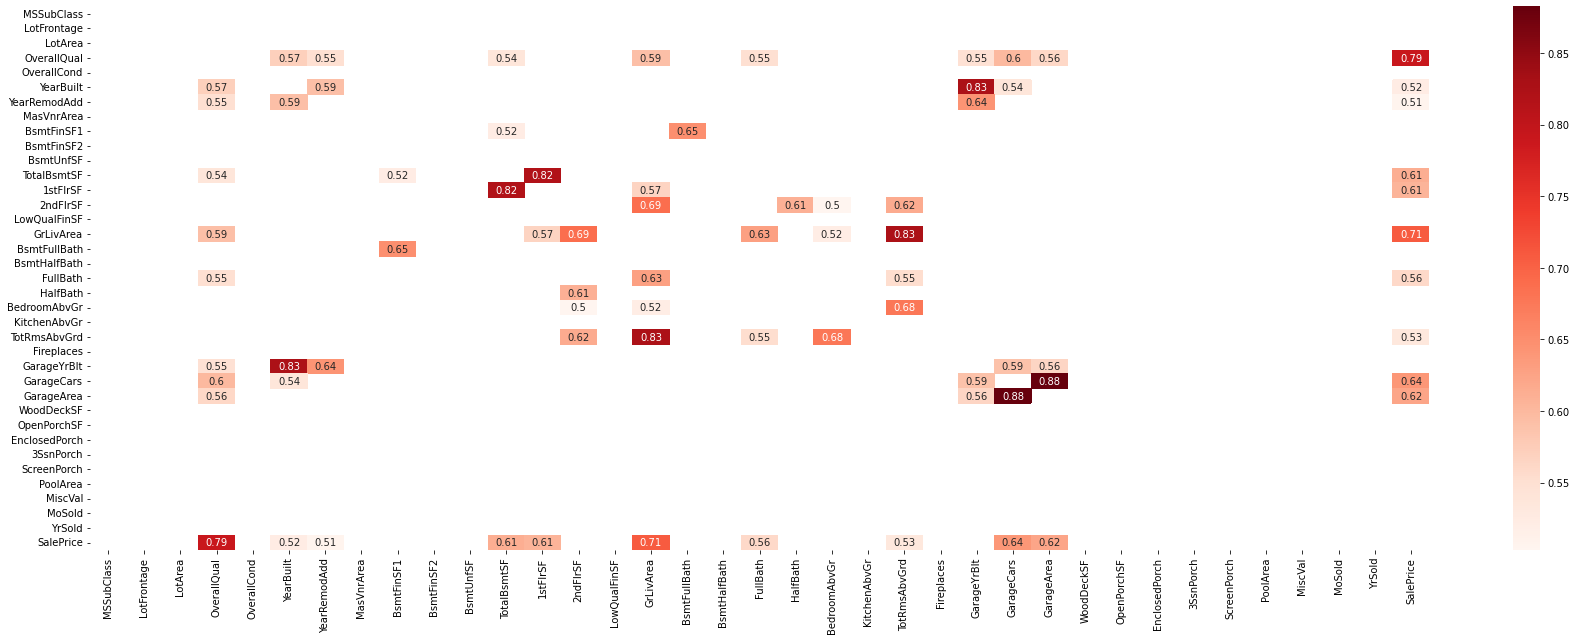

In [ ]:
# Look at every features
dfCorr = train.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

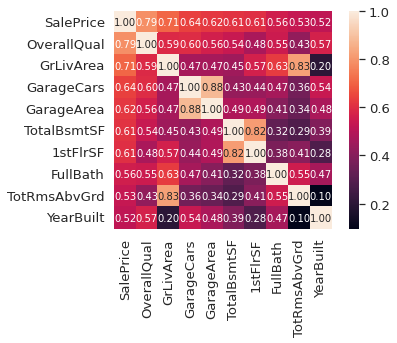

In [ ]:
# Focus on 10 features that have high correlation with our "SalePrice"
# Focus on independent variables if they have high correlation with each other (THAT'S A PROBLEM!!)
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

High Correlaion with SalePrice:

*  OverallQual
*   GrLivArea

Medium Correlation with SalePrice:

*   GarageCars
*   GarageArea
*   TotalBsmtSF
*   lstFlrSF
*   FullBath
*   TotRmsAbvGrd
*   YearBuilt


---------------**multicollinearity check**-------------

* 'GarageCars' and 'GarageArea' have high correlation so we will keep only *'GarageCars'* since it has higher correlation with 'SalePrice' more than 'GarageArea'
* 'TotalBsmtSF' and '1stFlrSF' in this case we will keep *'TotalBsmtSF'*
* 'GrLivArea' and 'TotRmsAbvGrd' in this case we will keep *'GrLivArea'*
* 'YearBuilt' and 'GarageYrBlt' in this case we will keep *'YearBuilt'*





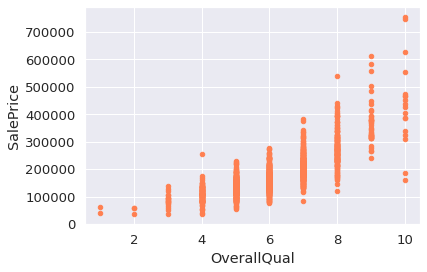

In [ ]:
# we can see that the relationship between 'SalePrice' and 'OverallQual' have positive ralation.
train.plot(x='OverallQual',y='SalePrice',kind='scatter',color='coral');

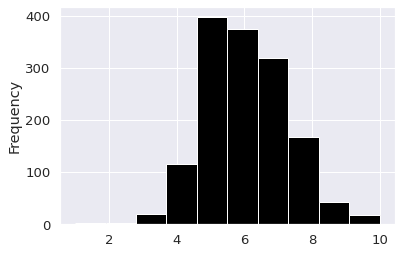

In [ ]:
# check how frequency of 'OverallQual'
train.OverallQual.plot.hist(color='black');

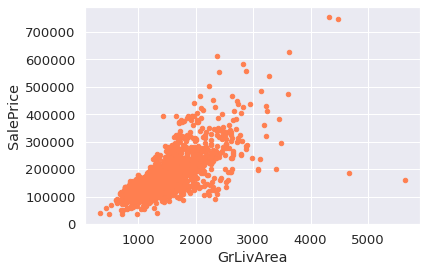

In [ ]:
# we can see that the relationship between 'SalePrice' and 'GrLivArea' have positive ralation.
train.plot(x='GrLivArea',y='SalePrice',kind='scatter',color='coral');

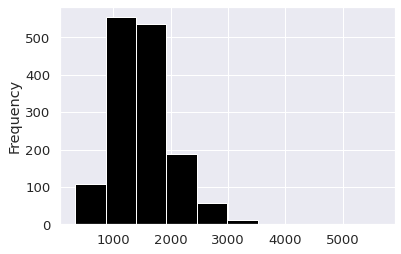

In [ ]:
# check how frequency of 'GrLivArea'
train.GrLivArea.plot.hist(color='black');

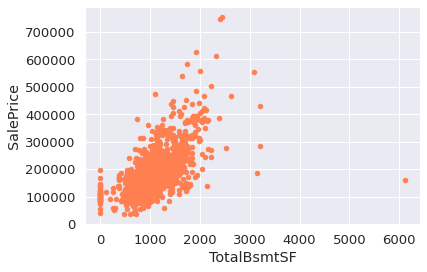

In [ ]:
# we can see that the relationship between 'SalePrice' and 'TotalBsmtSF' have positive ralation.
train.plot(x='TotalBsmtSF',y='SalePrice',kind='scatter',color='coral');

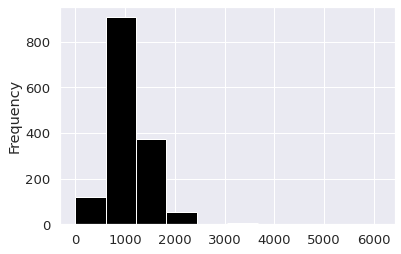

In [ ]:
# check how frequency of 'TotalBsmtSF'
train.TotalBsmtSF.plot.hist(color='black');

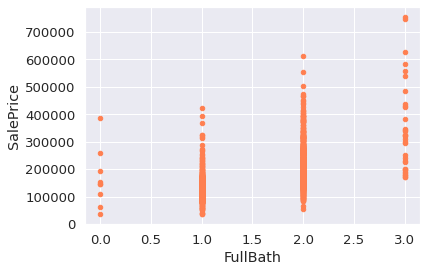

In [ ]:
# we can see that the relationship between 'SalePrice' and 'fullBaht' have positive ralation.
train.plot(x='FullBath',y='SalePrice',kind='scatter',color='coral');

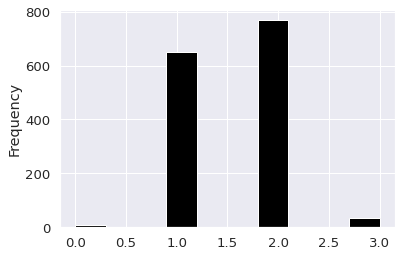

In [ ]:
# check how frequency of 'FullBath'
train.FullBath.plot.hist(color='black');

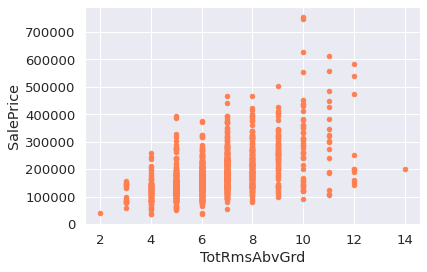

In [ ]:
# we can see that the relationship between 'SalePrice' and 'TotRmsAbvGrd' have positive ralation.
train.plot(x='TotRmsAbvGrd',y='SalePrice',kind='scatter',color='coral');

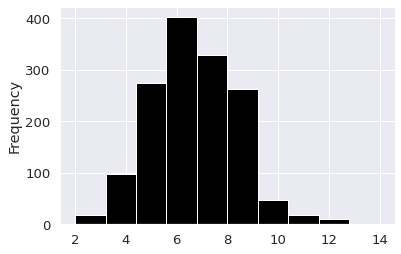

In [ ]:
# check how frequency of 'TotRmsAbvGrd'
train.TotRmsAbvGrd.plot.hist(color='black');

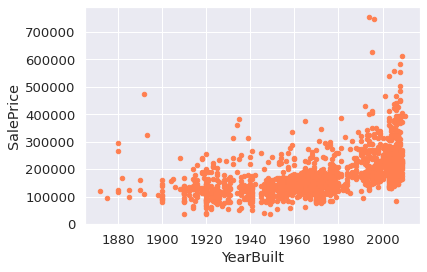

In [ ]:
# we can see that the relationship between 'SalePrice' and 'YearBuilt' have positive ralation.
train.plot(x='YearBuilt',y='SalePrice',kind='scatter',color='coral');

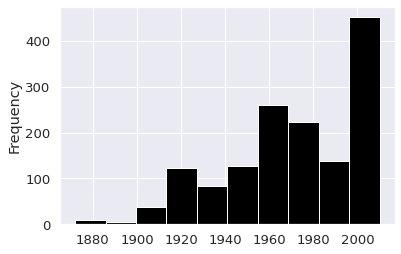

In [ ]:
# check how frequency of 'YearBuilt'
train.YearBuilt.plot.hist(color='black');

### Data Cleansing


In [ ]:
# concat the train and test dataset so that can be easily to check which column should be cleansing
t = pd.concat([train,test])
# drop 'SalePrice' since the test dataset has no 'SalePrice' column
t.drop('SalePrice',axis=1,inplace=True)

In [ ]:
missing = t.isnull().sum()[t.isnull().sum() > 0]
missing_df = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(t)*100}).sort_values(by = 'NaN_percentage', ascending = False)
missing_df

,NaN_count,NaN_percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


In [ ]:
# check numeric columns which contain NaN 
for label, content in t.items():
      if  pd.api.types.is_numeric_dtype(content):
          if pd.isnull(content).sum():
              print(label)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [ ]:
# check non numeric columns which contain NaN 
for label, content in t.items():
      if not pd.api.types.is_numeric_dtype(content):
          if pd.isnull(content).sum():
              print(label)

MSZoning
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [ ]:
def  preprocess_data(df):
      df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1,inplace=True)  # we will drop Since thay have more than 80% of NaN
      df.drop(['GarageArea',  '1stFlrSF',  'TotRmsAbvGrd'], axis=1,inplace=True)  # multicollinearity problem that we talk about earlier
      # object type : NA = None
      features = df[[ 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']];
      for col in features:
           df[col] = df[col].fillna('None')
      # object type fill na with mode
      features2 = df[['MSZoning','Utilities', 'Exterior1st','Exterior2nd','MasVnrType', 'Electrical','KitchenQual','Functional','SaleType']];
      for col in features2:
           df[col] = df[col].fillna(df[col].mode()[0])
     # Numeric column fill na with median
      features3 = df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','TotalBsmtSF','BsmtHalfBath','GarageYrBlt','GarageCars']];
      for col in features3:
           df[col] = df[col].fillna(df[col].median())
      # make it as type int
      features4 = df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','TotalBsmtSF','BsmtHalfBath','GarageYrBlt','GarageCars']];
      for col in features4:
           df[col] = df[col].astype(int)

      return df

In [ ]:
preprocess_data(train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
preprocess_data(test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [ ]:
train.isnull().sum().max()

0

In [ ]:
test.isnull().sum().max()

0

### Handling Duplicates

In [ ]:
# print how many duplicate rows in the dataframe
print("Number of duplicate rows in train dataset = ", train.duplicated().sum())
print("Number of duplicate rows in test dataset = ", test.duplicated().sum())

Number of duplicate rows in train dataset =  0
Number of duplicate rows in test dataset =  0


In [ ]:
# Check if our dependent variable contain value 0
train[train['SalePrice'] == 0] 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Inferential Statistics

***Check if our "SalePrice" has Normal distribution?***

In [ ]:
from scipy.stats import kurtosis, kurtosistest
k = kurtosis(train['SalePrice'])
zscore, pvalue = kurtosistest(train['SalePrice'])
print ('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis 6.510 z-score 14.263 p-value 0.000


We can see that 'SalePrice' is not normal distribution so we will make it looks more normal since we use Regression model therefore our **target** should be normal.

- *let's plot for more visulize!*

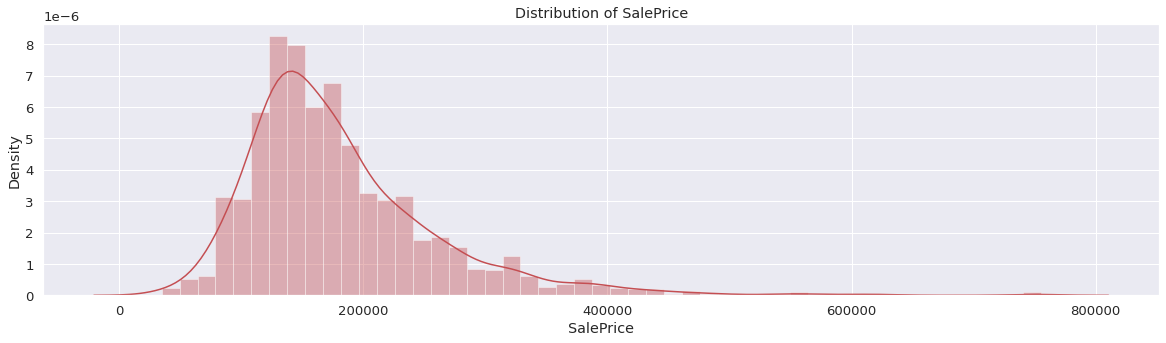

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Distribution of SalePrice")
ax = sns.distplot(train["SalePrice"],color='r')

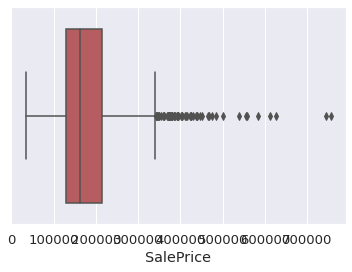

In [ ]:
sns.boxplot(train["SalePrice"],color='r');

###Detecting Outliers 

In [ ]:
import pandas as pd
from pandas.api.types import is_object_dtype
from pandas.api.types import is_numeric_dtype
def get_cat_num_features(df):
    
    num_features = []
    cat_features = []
    
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_features.append(col)
                
        if is_object_dtype(df[col]):
            cat_features.append(col)
            
    return num_features, cat_features

In [ ]:
def calc_interquartile(df, column):
    
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    
    return lower, upper, lower_outliers.shape[0]+upper_outliers.shape[0]

def get_outliers(df, num_feat):
    
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    
    for col in num_feat:
        lower, upper, total = calc_interquartile(df, col)
        if total != 0 and (upper !=0 and lower!=0):
            outlier_df = outlier_df.append({'Feature':col, 'Total Outliers': total,
                                       'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
        
    return outlier_df

num_feat, _ = get_cat_num_features(train)

outlier_df = get_outliers(train, num_feat)
outlier_df    


,Feature,Total Outliers,Upper limit,Lower limit
0,MSSubClass,103,145.000,-55.000
1,LotFrontage,106,107.500,31.500
2,LotArea,69,17673.500,1481.500
3,OverallQual,2,10.000,2.000
4,OverallCond,125,7.500,3.500
5,YearBuilt,7,2069.000,1885.000
6,MasVnrArea,98,410.625,-246.375
7,BsmtFinSF1,7,1780.625,-1068.375
8,BsmtUnfSF,29,1685.500,-654.500
9,TotalBsmtSF,61,2052.000,42.000


Using the IQR method, we find 61 SalePrice outliers in the dataset. I printed the min and max values to verify they match the statistics we saw when using the pandas describe() function, which helps confirm we calculated the outliers correctly. 


### Drop Outliers

In [ ]:
def remove_outliers(df, outlier_df, num_feat):
    
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        
        df[col] = np.where(df[col]>upper, upper, df[col])
        df[col] = np.where(df[col]<lower, lower, df[col])
        
    return df

cleaned_df = remove_outliers(train, outlier_df, num_feat)

In [ ]:
# no outlier
get_outliers(cleaned_df, num_feat)

,Feature,Total Outliers,Upper limit,Lower limit


## 5. Modelling

In [ ]:
train.shape, test.shape

((1460, 73), (1459, 72))

In [ ]:
# Check which columns contain strings
for label, content in train.items():
      if  pd.api.types.is_string_dtype(content):
              print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
#Convert categorical variable into dummy/indicator variables.
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Split data into X & y

In [ ]:
X = train.drop(["SalePrice"], axis=1) # our predictors but 'SalePrice'
y = train.SalePrice # 'SalePrice' (outcome,y, dependent variables)

In [ ]:
# Tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Split into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # train sample size 80% and test sample size 20% 

In [ ]:
# check shape 
X_train.shape, test.shape

((1168, 282), (1459, 266))

In [ ]:
# we can see how differ of culumn using set
set(X_train.columns) - set(test.columns)

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa'}

In [ ]:
test[['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa']] = False

### Hyperparameter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters

# set param distributions in to dictionary so we can simply use and make change
rf_grid = {"n_estimators": np.arange(10, 500, 10),
               "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2),
                "max_features": [0.5, 1, "sqrt", "auto"],
                "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid, 
                              n_iter=100,
                              cv=5,
                              verbose=True)
# fit X_train,y_train to our model so it will learn these train set
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 11.4 s, sys: 138 ms, total: 11.5 s
Wall time: 17 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
                   verbose=True)

In [ ]:
# Best parameters from the RandomizedSearch
rs_model.best_params_

{'n_estimators': 490,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': 5}

In [ ]:
# fit model1 with # Best parameters from the RandomizedSearch
model1 = RandomForestRegressor(n_estimators=490,
                               min_samples_split=10,
                               min_samples_leaf=13,
                               max_features='auto',
                               max_depth=5,
                               n_jobs=-1,
                               max_samples=None)
model1.fit(X_train,y_train)
# predict 'SalePrice' from test dataset with model1
test_preds = model1.predict(test)

In [ ]:
# fit model2 with n_estimators=500 and the original of other parameters
model2 = RandomForestRegressor(n_estimators=500)
model2.fit(X_train, y_train)
# predict 'SalePrice' from test dataset with model2
preds = model2.predict(test)

In [ ]:
# Tools
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
# we want to see MAE, RMSE, R^2. so that we can tell which model is working better
def show_scores(model):
    train_preds = model.predict(X_train)
    scores = {"MAE": mean_absolute_error(y_train, train_preds),
              "RMSE": sqrt(mean_squared_error(y_train, train_preds)),
              "R^2": model.score(X_train, y_train),}
    return scores

In [ ]:
show_scores(model1)

{'MAE': 15897.305199697088,
 'RMSE': 22364.75947428159,
 'R^2': 0.8867319749390751}

In [ ]:
show_scores(model2)

{'MAE': 5762.481296232877,
 'RMSE': 8414.980960321627,
 'R^2': 0.9839644027523469}

* As we can see that **model2** is better than **model1** since 'model2' had RMSE and MAE less than 'model1' and also R^2 of 'model2' is higher. Then we will choose ***model2*** to predict sale price for the test dataset and submit it.

#### Submission

In [ ]:
df_preds= pd.DataFrame()
#test_ID that we seperate from the first place
df_preds["Id"] = test_ID
# predicted of 'SalePrice' from test dataset with model2
df_preds['SalePrice'] = preds
df_preds

,Id,SalePrice
0,1461,113613.608
1,1462,150776.544
2,1463,175454.462
3,1464,180067.812
4,1465,206095.463
...,...,...
1454,2915,87599.464
1455,2916,88086.950
1456,2917,157782.590
1457,2918,115813.038


In [ ]:
df_preds.to_csv('/content/drive/MyDrive/project/submission.csv',index=False)

### Feature Importance
After our model learned the patterns in the data, which attributes were most importance for predicting its overall sale price.
So that we can keep exploring our data and modelling for better one.

In [ ]:
# plotting feature importance
def plot_features(columns, importances, n=20):
    dff = (pd.DataFrame({'features':columns,
                         'feature_importance':importances})
              .sort_values('feature_importance', ascending=False)
              .reset_index(drop=True))
    sns.barplot(x='feature_importance',
                y='features',
                data=dff[:n],
                orient='h')

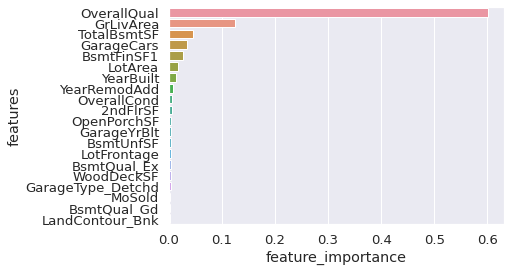

In [ ]:
plot_features(X_train.columns, model2.feature_importances_)